
Training autoencoder with latent dimension: 2
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0816 - val_loss: 0.0543
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0534 - val_loss: 0.0506
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0502 - val_loss: 0.0486
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0485 - val_loss: 0.0473
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0472 - val_loss: 0.0464
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0462 - val_loss: 0.0457
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0454 - val_loss: 0.0450
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0447 - val_loss: 0.0445
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0444 - val_loss: 0.0441
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0437 - val_loss: 0.0436
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0434 - val_loss: 0.0434
Epoch

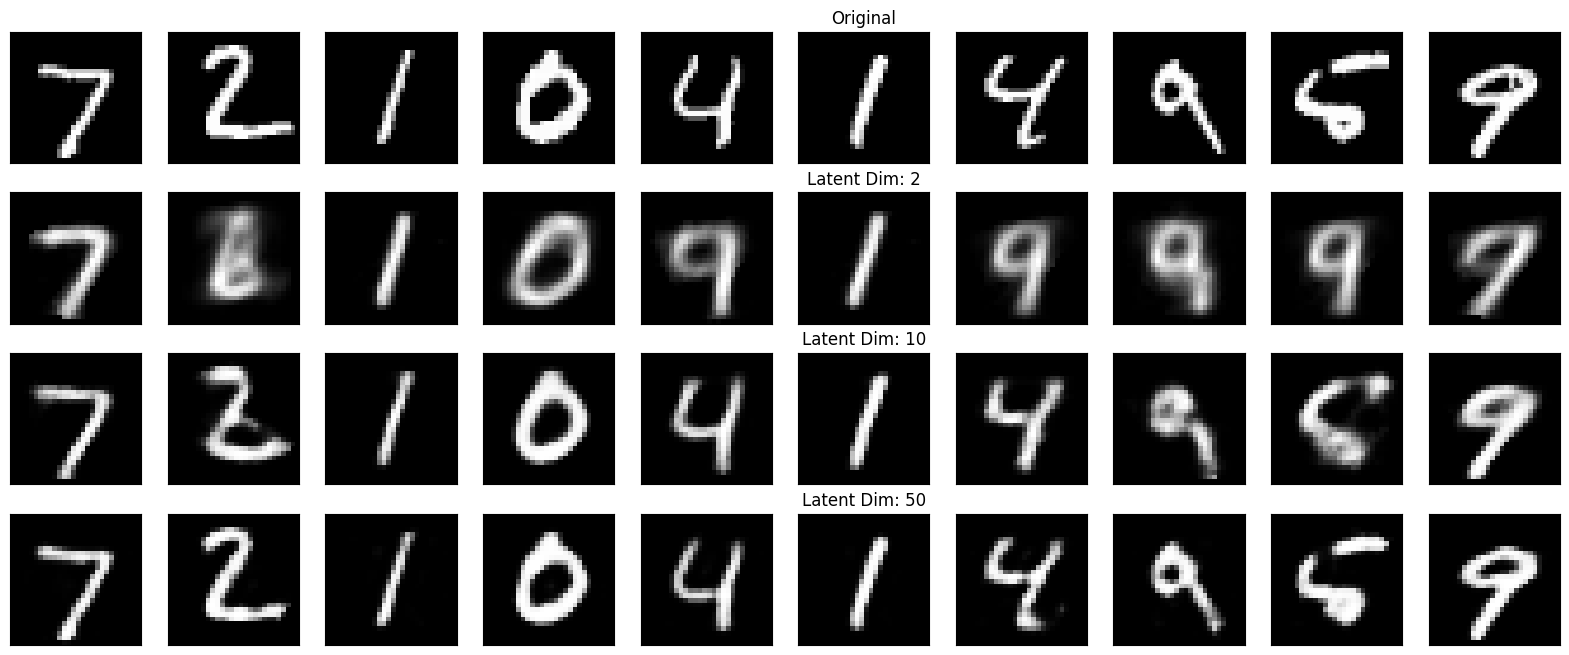

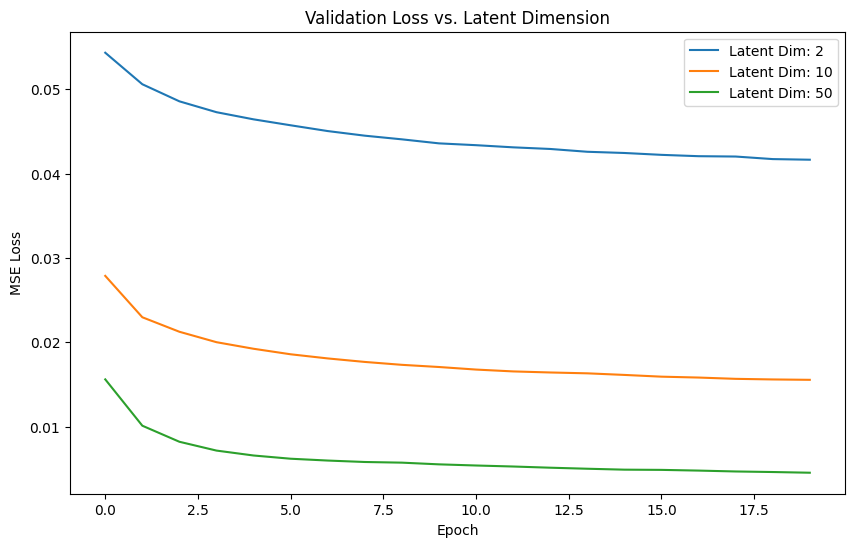

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

def build_autoencoder(latent_dim):
    encoder_inputs = keras.Input(shape=(784,))
    x = layers.Dense(256, activation="relu")(encoder_inputs)
    z = layers.Dense(latent_dim, activation="relu", name="latent_space")(x)
    decoder_inputs = layers.Dense(256, activation="relu")(z)
    decoder_outputs = layers.Dense(784, activation="sigmoid")(decoder_inputs)
    autoencoder = keras.Model(encoder_inputs, decoder_outputs, name="autoencoder")
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder

latent_dims = [2, 10, 50]
histories = {}
reconstructions = {}

for dim in latent_dims:
    print(f"\nTraining autoencoder with latent dimension: {dim}")
    autoencoder = build_autoencoder(dim)
    history = autoencoder.fit(
        x_train, x_train,
        epochs=20,
        batch_size=128,
        shuffle=True,
        validation_data=(x_test, x_test),
    )
    histories[dim] = history
    reconstructions[dim] = autoencoder.predict(x_test)

def plot_reconstructions(x_test, reconstructions, latent_dims):
    n = 10 # Number of digits to display
    rows = len(latent_dims) + 1 # One row for original, one for each latent dim
    plt.figure(figsize=(n * 2, rows * 2))
    for i in range(n):
        # Display original
        ax = plt.subplot(rows, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title("Original")

        # Display reconstructions for each latent dimension
        for j, dim in enumerate(latent_dims):
            ax = plt.subplot(rows, n, (j + 1) * n + i + 1)
            plt.imshow(reconstructions[dim][i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            if i == n // 2:
                 ax.set_title(f"Latent Dim: {dim}")
    plt.show()

plot_reconstructions(x_test, reconstructions, latent_dims)

def plot_loss(histories, latent_dims):
    plt.figure(figsize=(10, 6))
    for dim in latent_dims:
        plt.plot(histories[dim].history["val_loss"], label=f"Latent Dim: {dim}")
    plt.title("Validation Loss vs. Latent Dimension")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()

plot_loss(histories, latent_dims)